# Jonathan Halverson
# Monday, April 3, 2017
# Leg reach model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

In [3]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [4]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df = df.drop(['Name', 'Name_L'], axis=1)
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Height,Reach,LegReach,Stance,Dob,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",69.0,71.0,41.0,Orthodox,1984-04-24,68.0,69.0,38.0,Southpaw,1981-10-17
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",74.0,77.0,42.0,Southpaw,1975-04-14,73.0,77.0,43.0,Southpaw,1984-01-04
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",73.0,72.0,41.0,Orthodox,1979-12-07,72.0,74.0,42.0,Orthodox,1981-01-28


In [5]:
win_lose = df.Winner.append(df.Loser).drop_duplicates().reset_index()
win_lose.columns = ['index', 'Name']
win_lose

,index,Name
0,0,Germaine de Randamie
1,1,Anderson Silva
2,2,Jacare Souza
3,3,Glover Teixeira
4,4,Dustin Poirier
5,5,Belal Muhammad
6,6,Wilson Reis
7,7,Islam Makhachev
8,8,Rick Glenn
9,9,Ryan LaFlare


In [6]:
all3 = win_lose.merge(fighters, on='Name', how='left')[['Name', 'LegReach', 'Reach', 'Height']].dropna()
all3

,Name,LegReach,Reach,Height
0,Germaine de Randamie,41.0,71.0,69.0
1,Anderson Silva,42.0,77.0,74.0
2,Jacare Souza,41.0,72.0,73.0
3,Glover Teixeira,42.0,76.0,74.0
4,Dustin Poirier,40.0,72.0,69.0
5,Belal Muhammad,40.0,72.0,71.0
6,Wilson Reis,36.0,65.0,64.0
7,Islam Makhachev,40.0,70.0,70.0
8,Rick Glenn,40.0,70.0,72.0
9,Ryan LaFlare,42.0,74.0,73.0


In [7]:
y = all3.LegReach.values
X = all3[['Reach', 'Height']].values

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X, y)

In [9]:
lr.score(X, y)

0.73618703538544283

In [10]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X)
mean_squared_error(all3.LegReach, y_pred)

1.5950758696611849

In [11]:
pd.DataFrame({'true':all3.LegReach, 'model':y_pred})

,model,true
0,39.620471,41.0
1,42.694457,42.0
2,41.468032,41.0
3,42.533502,42.0
4,39.781426,40.0
5,40.624729,40.0
6,36.546485,36.0
7,39.881168,40.0
8,40.724471,40.0
9,41.789941,42.0


In [12]:
lr.coef_

array([ 0.16095475,  0.42165158])

In [13]:
lr.intercept_

-0.90127487835649589

In [14]:
def impute_legreach(r, h):
     return 0.16095475 * r + 0.42165158 * h - 0.901274878

In [15]:
pts = [(r, h, impute_legreach(r, h)) for r in np.linspace(60, 85) for h in np.linspace(60, 85)]
pts = pd.DataFrame(pts)
pts.columns = ['Reach', 'Height', 'LegReach']
pts

,Reach,Height,LegReach
0,60.0,60.000000,34.055105
1,60.0,60.510204,34.270233
2,60.0,61.020408,34.485362
3,60.0,61.530612,34.700490
4,60.0,62.040816,34.915618
5,60.0,62.551020,35.130747
6,60.0,63.061224,35.345875
7,60.0,63.571429,35.561003
8,60.0,64.081633,35.776132
9,60.0,64.591837,35.991260


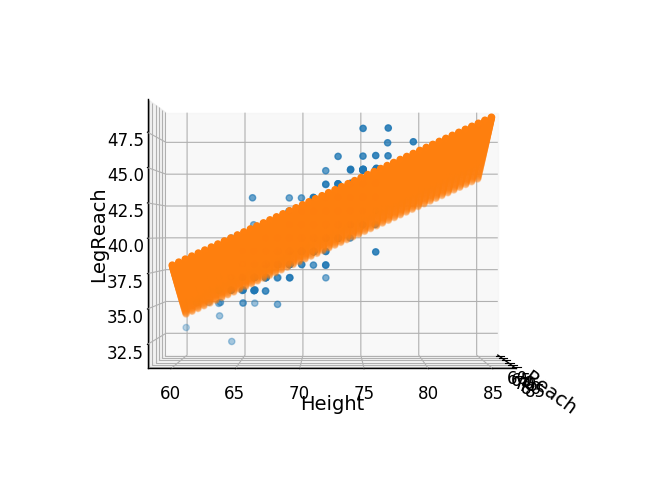

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all3.Reach, all3.Height, all3.LegReach)
ax.scatter(pts.Reach, pts.Height, pts.LegReach)
ax.set_xlabel('Reach')
ax.set_ylabel('Height')
ax.set_zlabel('LegReach')
ax.view_init(elev=0, azim=0)

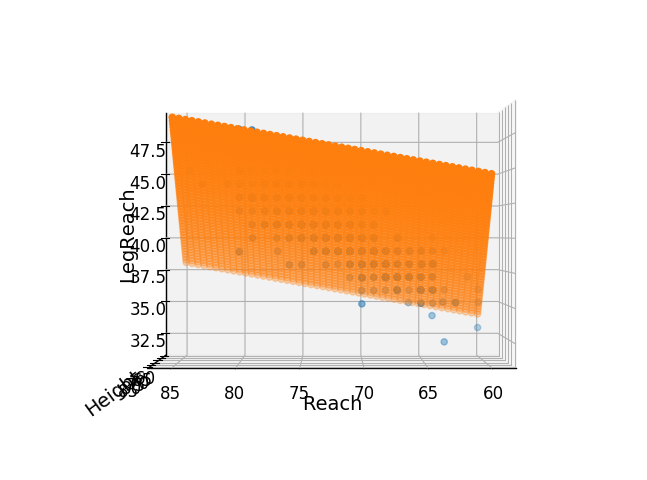

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all3.Reach, all3.Height, all3.LegReach)
ax.scatter(pts.Reach, pts.Height, pts.LegReach)
ax.set_xlabel('Reach')
ax.set_ylabel('Height')
ax.set_zlabel('LegReach')
ax.view_init(elev=0, azim=90)

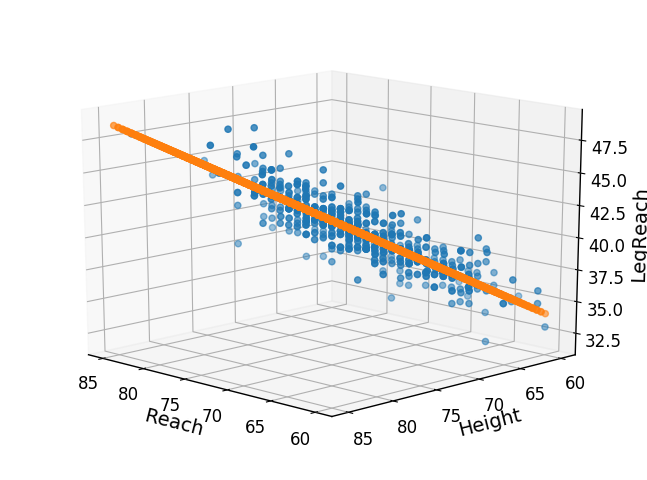

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all3.Reach, all3.Height, all3.LegReach)
ax.scatter(pts.Reach, pts.Height, pts.LegReach)
ax.set_xlabel('Reach')
ax.set_ylabel('Height')
ax.set_zlabel('LegReach')
ax.view_init(elev=16, azim=135)

# Model to relate height to legreach

In [19]:
import scipy
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(all3.Height.values, all3.LegReach.values)
slope, intercept, r_value, p_value, std_err

(0.59770262267310836,
 -1.6969727854651353,
 0.84953366484428905,
 3.1794116222855016e-158,
 0.01565623033671211)

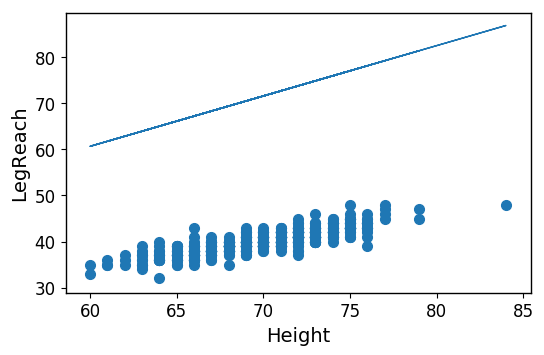

In [24]:
plt.plot(all3.Height.values, slope * all3.Height.values + intercept)
plt.scatter(all3.Height.values, all3.LegReach.values)
plt.xlabel('Height')
plt.ylabel('LegReach')

### Reach to Height

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(x=all3.Height.values, y=all3.Reach.values)
slope, intercept, r_value, p_value, std_err

(1.0937922013946104,
 -4.9436125667790805,
 0.90121057715425423,
 3.1117363843663846e-206,
 0.022187620015024084)

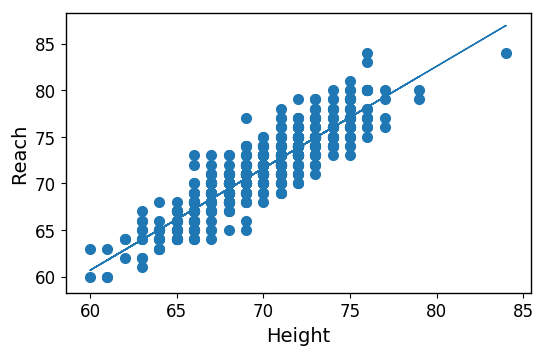

In [23]:
plt.plot(all3.Height.values, slope * all3.Height.values + intercept)
plt.scatter(all3.Height.values, all3.Reach.values)
plt.xlabel('Height')
plt.ylabel('Reach')